In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
data=pd.read_csv("../std_data.csv").drop(["id"],axis=1)

#std = StandardScaler()

pca = PCA(n_components=5)
data_train = data.drop(["type"], axis=1)
color = data["type"]
#data_train = std.fit_transform(data_train)
data_after_pca = pca.fit_transform(data_train)
print(pca.explained_variance_ratio_)
data_after_pca = pd.DataFrame(data_after_pca)
print(data_after_pca)


[0.84640012 0.09054104 0.03555058 0.0090796  0.00690615]
            0          1         2         3         4
0  -32.264808   4.900518  8.146015 -2.873415 -3.709951
1   24.091364 -13.941977  5.189584 -0.337296  1.523010
2  -44.210356  -3.317435 -1.048365  0.281961 -1.784310
3  -24.523976   9.563687  9.998539 -4.825546 -2.549563
4  -30.485062   5.835433  9.963239 -2.773448 -0.940398
..        ...        ...       ...       ...       ...
64  47.132322 -14.517857  9.165808  7.132963 -2.756026
65   6.015292  -6.906022 -5.060767 -2.227910 -0.232414
66  28.790990  -1.105450 -5.740037 -1.680753  0.156030
67  34.561842  -1.013432 -7.044949 -4.402647  1.447143
68  25.399398  -1.704840  4.246778  3.960649 -1.535410

[69 rows x 5 columns]


/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38078 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/cqy/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning

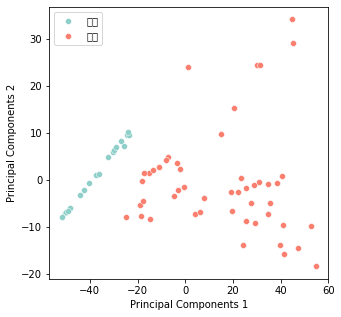

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
colors=[]
colors_=[]
mask=[]
mask_=[]
for i in range(len(color)):
    if color[i] == 1:
        # 高钾
        colors.append('#8ECFC9')
        mask.append(True)
        mask_.append(False)
    else:
        # 钡铅
        colors_.append('#FA7F6F')
        mask_.append(True)
        mask.append(False)
%matplotlib inline
plt.figure(figsize=[5, 5])
sns.scatterplot(x=(np.array(data_after_pca[0])[mask]),
                y=(np.array(data_after_pca[1])[mask]), color='#8ECFC9', label='高钾')
sns.scatterplot(x=(np.array(data_after_pca[0])[mask_]),
                y=(np.array(data_after_pca[1])[mask_]), color='#FA7F6F', label='钡铅')
plt.xlabel("Principal Components 1")
plt.ylabel("Principal Components 2")
plt.legend()
plt.savefig("pca_fig.png")


In [4]:
# 确定权重
# 求指标在不同主成分线性组合中的系数
k1_spss = pca.components_.T
weight = (np.dot(k1_spss, pca.explained_variance_ratio_)) / np.sum(pca.explained_variance_ratio_)
print('weight:',weight)
# 
weighted_weight = weight/np.sum(weight)
print('weighted_weight:', weighted_weight)

print(weighted_weight.argsort())


weight: [ 5.38342677e-03 -7.09947692e-01 -7.83550991e-03 -3.59679595e-02
  1.80426175e-02  1.11997717e-03 -2.48134733e-03 -2.56520693e-04
  1.82546006e-02  4.52774858e-01  1.61552265e-01  6.97901424e-02
  5.30294272e-03 -8.29541686e-04  3.04811677e-02]
weighted_weight: [ 1.00000000e+00 -1.31876539e+02 -1.45548742e+00 -6.68123875e+00
  3.35151164e+00  2.08041683e-01 -4.60923392e-01 -4.76500757e-02
  3.39088862e+00  8.41053250e+01  3.00091879e+01  1.29638881e+01
  9.85049661e-01 -1.54091756e-01  5.66203815e+00]
[ 1  3  2  6 13  7  5 12  0  4  8 14 11 10  9]


In [5]:
# 因子分析代码
from factor_analyzer import factor_analyzer, Rotator
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import MinMaxScaler,StandardScaler
data = pd.read_csv("../std_data.csv").drop(["id"], axis=1)
data=data.drop(["type"],axis=1)
std = StandardScaler()
data_zs = std.fit_transform(data)
data_zs
kmo = calculate_kmo(data)  
# bartlett球形度检验p值要小于0.05
bartlett = calculate_bartlett_sphericity(data)  
print("\n因子分析适用性检验:")
print('kmo:{},bartlett:{}'.format(kmo[1], bartlett[1]))

# 皮尔森相关系数
data_corr=data.corr()
print("\n相关系数:\n",data_corr)
#获得协方差矩阵，cov是numpy库中计算协方差的函数，获得协方差矩阵9*9
#注：标准化后的矩阵的协方差矩阵 即为 原始数据的相关系数矩阵
data_zs_cov = np.cov(data_zs.T)
print("\n协方差矩阵：\n",data_zs_cov)



因子分析适用性检验:
kmo:0.3262397308293979,bartlett:nan

相关系数:
           degree       sio       nao        ko       cao       mgo       alo  \
degree  1.000000 -0.401950 -0.033360 -0.580315 -0.166618 -0.126884 -0.172302   
sio    -0.401950  1.000000  0.144986  0.361133 -0.173903  0.032410  0.187792   
nao    -0.033360  0.144986  1.000000  0.108935 -0.148994 -0.001710  0.077210   
ko     -0.580315  0.361133  0.108935  1.000000  0.535752  0.255827  0.320561   
cao    -0.166618 -0.173903 -0.148994  0.535752  1.000000  0.302628  0.342471   
mgo    -0.126884  0.032410 -0.001710  0.255827  0.302628  1.000000  0.492743   
alo    -0.172302  0.187792  0.077210  0.320561  0.342471  0.492743  1.000000   
feo    -0.376862  0.098078 -0.170847  0.366693  0.452435  0.418589  0.411218   
cuo    -0.006888 -0.235874 -0.065341  0.077436  0.087653 -0.208272 -0.162756   
pbo     0.503356 -0.853243 -0.168749 -0.568140 -0.055398 -0.098958 -0.352490   
bao     0.213215 -0.630362 -0.027009 -0.407529 -0.208497 -0.3641

/home/cqy/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/home/cqy/anaconda3/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
